## Загрузка и предобработка данных перед анализом

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Данные скачаны здесь https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?select=train-data.csv
## данные про продажу Б/У машин

df = pd.read_csv('cars.csv')

print('Размер датафрейма: ', df.shape)

df.head()

Размер датафрейма:  (6019, 14)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
## Удалим ненужные колонки

df = df.drop(['Unnamed: 0', 'New_Price'], axis=1)

In [4]:
## Преобразуем некоторые колонки, для дальнейшего удобства работы с ними

df['Power'] = df['Power'].str.replace(' bhp', '')
df.loc[df['Power'] == 'null', 'Power'] = np.nan
df['Power'] = df['Power'].astype(float)

df['Engine'] = df['Engine'].str.replace(' CC', '')
df.loc[df['Engine'] == 'null', 'Engine'] = np.nan
df['Engine'] = df['Engine'].astype(float)

df['Mileage'] = df['Mileage'].str.replace(' kmpl', '')
df['Mileage'] = df['Mileage'].str.replace(' km/kg', '')

df.loc[df['Mileage'] == 'null', 'Mileage'] = np.nan
df['Mileage'] = df['Mileage'].astype(float)

### Описание колонок

Name - The brand and model of the car

Location - The location in which the car is being sold or is available for purchase

Year - The year or edition of the model

Kilometers_Driven - The total kilometres driven in the car by the previous owner(s) in KM

Fuel_Type - The type of fuel used by the car. (Petrol / Diesel / Electric / CNG / LPG)

Transmission - The type of transmission used by the car. (Automatic / Manual)

Owner_Type - Whether the ownership is Firsthand, Second hand or other

Mileage - The standard mileage offered by the car company in kmpl or km/kg

Engine - The displacement volume of the engine in cc

Power -  The maximum power of the engine in bhp.

Seats - Number of seats

Price - Price of auto

## Обзор данных

In [5]:
df.info()

## информация по датафрейму, видно что есть миссинги, рассмотрим более подробно в следующей ячейке

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [6]:
df.isna().sum()

## Есть миссинги в колонках Mileage, Engine, Power, Seats

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [7]:
df = df.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats'])

## Выбросим данные с миссингами для дальнейшего удобства работы

In [8]:
df['Year'].value_counts()

## Видно, что данные состоят из машин раных годов производства (с 1999 по 2019), больше всего машин 2014 года выпуска

2014    794
2015    740
2016    737
2013    639
2017    586
2012    562
2011    452
2010    333
2018    298
2009    191
2008    162
2007    105
2019    102
2006     66
2005     42
2004     25
2003     14
2002     11
2000      4
2001      4
1998      3
1999      2
Name: Year, dtype: int64

In [9]:
df['Transmission'].value_counts()

## машины бывают двух видов - с автоматической коробкой передач и ручной

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

In [10]:
df['Fuel_Type'].value_counts()

## тип топлива бывает четырех видов - Дизель, Бензин, Природный газ, Углеводородные газы

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [11]:
df['Owner_Type'].value_counts()

## собственником машин мог быть как 1 владелец так и более

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [12]:
df.dtypes

## У нас есть как строковые так и числовые типы данных

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [13]:
df['Kilometers_Driven'] = df['Kilometers_Driven'].astype('float64')

## Группировка данных

In [14]:
plt.style.use('ggplot')

Text(0, 0.5, 'Price')

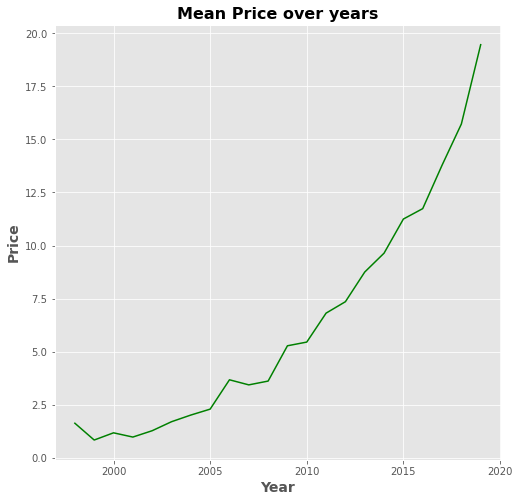

In [15]:
plt.figure(figsize=(8, 8))

df.groupby('Year')['Price'].mean().plot(color='g')

plt.title('Mean Price over years', weight='bold', size=16)
plt.xlabel('Year', weight='bold', size=14)
plt.ylabel('Price', weight='bold', size=14)

## Посмотрим на среднюю цену автомобилей по различному году выпуска
## Видно, что чем новее автомобиль, тем выше его стоимость

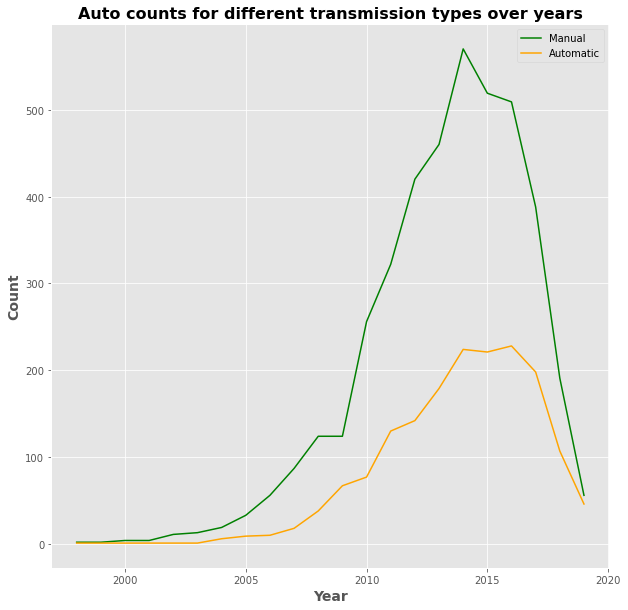

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
subdf = df.groupby(['Year', 'Transmission'])['Name'].count()
subdf = subdf.reset_index()
subdf[subdf['Transmission'] == 'Manual'][['Year', 'Name']].set_index('Year').plot(color='g', ax=ax)
subdf[subdf['Transmission'] != 'Manual'][['Year', 'Name']].set_index('Year').plot(color='orange', ax=ax)

ax.set_title('Auto counts for different transmission types over years', weight='bold', size=16)
ax.set_xlabel('Year', weight='bold', size=14)
ax.set_ylabel('Count', weight='bold', size=14)
ax.legend(['Manual', 'Automatic'])
plt.show()
## Видно что количество машин с автоматической коробкой передач и механической растет неодинаково с годом выпуска

Text(0, 0.5, 'Kilometers_Driven')

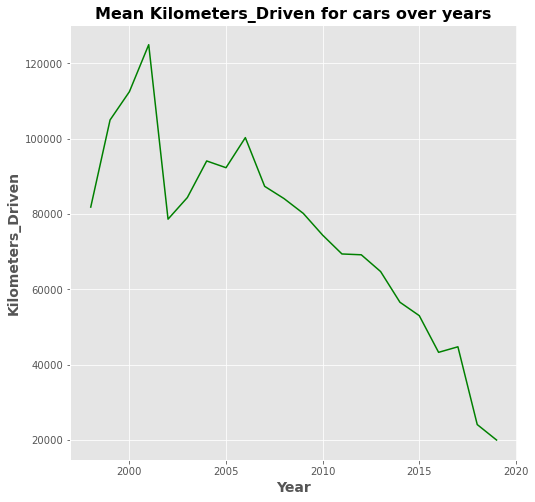

In [17]:
plt.figure(figsize=(8, 8))

df.groupby('Year')['Kilometers_Driven'].mean().plot(color='g')

plt.title('Mean Kilometers_Driven for cars over years', weight='bold', size=16)
plt.xlabel('Year', weight='bold', size=14)
plt.ylabel('Kilometers_Driven', weight='bold', size=14)

## Видно, что чем меньше лет машине, тем меньше у нее пробег

Text(0, 0.5, 'Price')

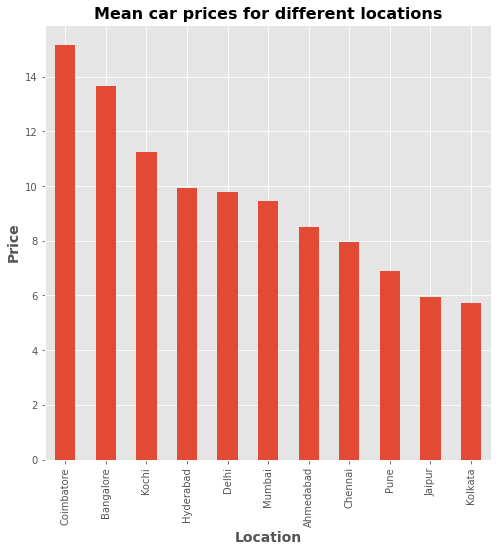

In [18]:
plt.figure(figsize=(8, 8))

df.groupby('Location')['Price'].mean().sort_values(ascending=False).plot.bar()

plt.title('Mean car prices for different locations', weight='bold', size=16)
plt.xlabel('Location', weight='bold', size=14)
plt.ylabel('Price', weight='bold', size=14)


## Видно, что самые дорогие машины продаются в Coimbatore, а самые дешевые в Kolkata

Text(0, 0.5, 'Price')

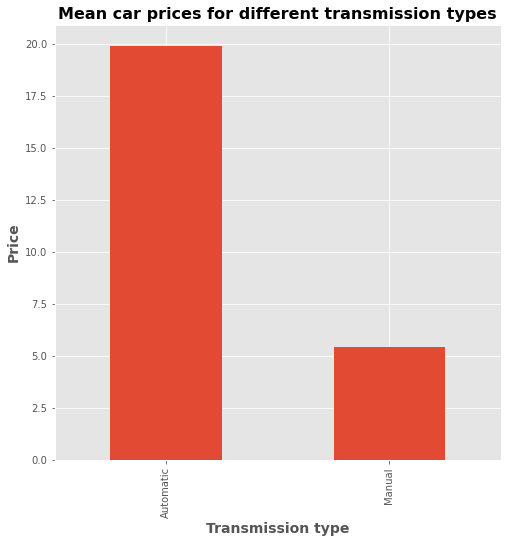

In [19]:
plt.figure(figsize=(8, 8))

df.groupby('Transmission')['Price'].mean().sort_values(ascending=False).plot.bar()

plt.title('Mean car prices for different transmission types', weight='bold', size=16)
plt.xlabel('Transmission type', weight='bold', size=14)
plt.ylabel('Price', weight='bold', size=14)


## Видно, что машины с автоматической коробкой передач стоят в разы выше чем механическая

##  Основные статистические характеристики

In [20]:
## Исследуем числовые признаки

subdf = df.loc[:, df.dtypes == 'float64']
subdf.describe()

## Видно, что самый высокий разброс у колонки Price - больше чем среднее ее значение

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [21]:
subdf[subdf['Price'] < 0]

## Нет отрицательных значений цены

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price


In [22]:
## медианы признаков

subdf_median = pd.DataFrame({'columns': subdf.columns, 'median': np.median(subdf.dropna(), axis=0)}).set_index('columns')

for x in subdf_median.index:
    print('Median of', x, subdf_median.loc[x].values[0])

    

Median of Kilometers_Driven 52609.0
Median of Mileage 18.2
Median of Engine 1495.5
Median of Power 97.7
Median of Seats 5.0
Median of Price 5.75


In [23]:
## коэффициенты эксцессы признаков - мера остроты пика распределения случайной величины.

subdf_kurt = subdf.kurt(skipna=True)

for x in subdf_kurt.index:
    print('Kurt coef of', x, subdf_kurt[x])


Kurt coef of Kilometers_Driven 4066.6471853877633
Kurt coef of Mileage 0.7636298799568095
Kurt coef of Engine 3.1125623284161454
Kurt coef of Power 6.507953749602381
Kurt coef of Seats 4.077437325528442
Kurt coef of Price 16.96280991721294


In [24]:
## коэффициенты ассиметрии признаков - характеризующие асимметрию распределения данной случайной величины.

subdf_assym = subdf.skew(skipna=True)

for x in subdf_assym.index:
    print('Assym coef of', x, subdf_assym[x])


Assym coef of Kilometers_Driven 58.45649852968201
Assym coef of Mileage -0.11471818971861192
Assym coef of Engine 1.4168792735464717
Assym coef of Power 1.9162060777084924
Assym coef of Seats 1.9150570384762058
Assym coef of Price 3.3230887805574807


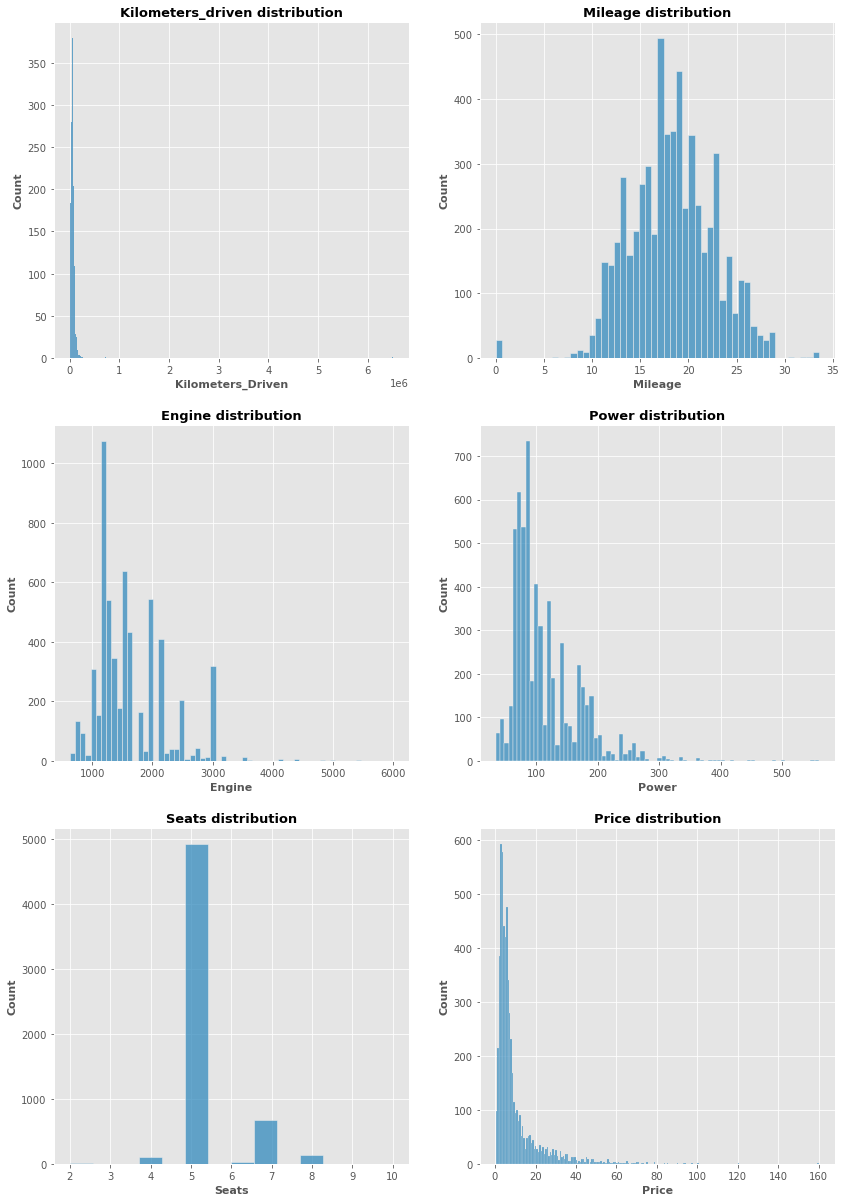

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(14, 21))

for ind, col in enumerate(subdf.columns):
    sns.histplot(subdf[col], ax=axs[ind // 2][ind % 2])
    
    axs[ind // 2][ind % 2].set_title(f'{col.capitalize()} distribution', weight='bold', size=13)
    axs[ind // 2][ind % 2].set_xlabel(col, weight='bold', size=11)
    axs[ind // 2][ind % 2].set_ylabel('Count', weight='bold', size=11)


## Графики распределения признакоы соответствуют ранее найденным коэффициентам, для положительных эксцесс характерны острые пики,
## для отличных от нуля значений коэфициентов ассиметрии соответствуют несимметричные графики

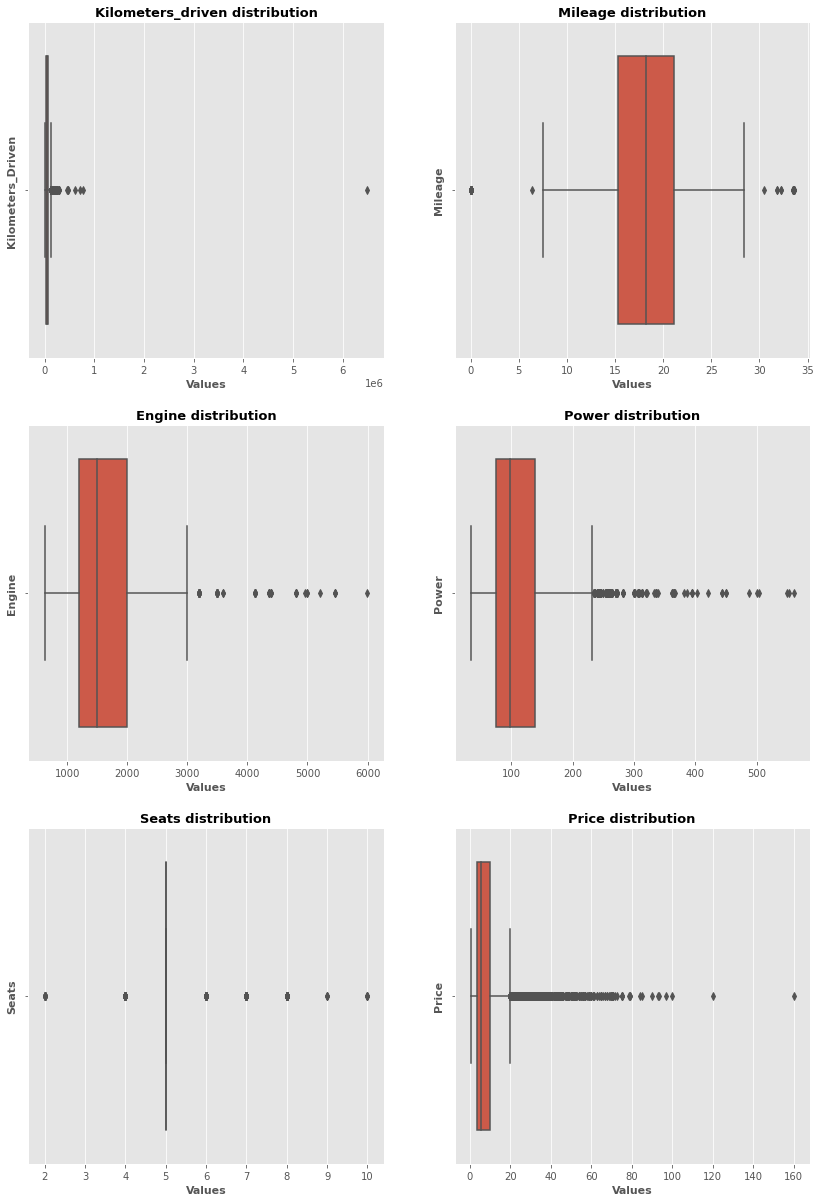

In [26]:
fig, axs = plt.subplots(3, 2, figsize=(14, 21))
for ind, col in enumerate(subdf.columns):

    sns.boxplot(x=col, data=subdf, ax=axs[ind // 2][ind % 2])

    
    axs[ind // 2][ind % 2].set_title(f'{col.capitalize()} distribution', weight='bold', size=13)
    axs[ind // 2][ind % 2].set_xlabel('Values', weight='bold', size=11)
    axs[ind // 2][ind % 2].set_ylabel(col, weight='bold', size=11)

## Графики "ящик с усами" показывают нам, что признаки KM_driven, Engine, Power и Price содержат больше всего выбросов

Построим доверительные интервалы признаков

In [27]:
import scipy

def find_bounds(df, a=0.05):
    df = df.dropna()
    h = scipy.stats.sem(df) * scipy.stats.t.ppf((1 + (1 - a)) / 2, df.shape[0] - 1)
    
    return [df.mean() - h, df.mean() + h]

lefts = []
rights = []
for col in subdf.columns:
    
    left, right = find_bounds(subdf[col])
    lefts.append(left)
    rights.append(right)

conf_df = pd.DataFrame({'col': subdf.columns, 'l_bound': lefts, 'r_bound': rights})
conf_df

,col,l_bound,r_bound
0,Kilometers_Driven,55959.066379,60674.931918
1,Mileage,18.166154,18.389524
2,Engine,1610.354014,1641.137131
3,Power,111.898455,114.655332
4,Seats,5.263123,5.304315
5,Price,9.316128,9.891709


## Нормальность распределений через стат тесты

In [28]:
## Проверим гипотезы о нормальности распределений с помощью стат тестов

In [29]:
## тест д'Агостино
from scipy.stats import normaltest

## тест шапиро уилка
from scipy.stats import shapiro



In [30]:
stats = []
pvals = []
for i in subdf.columns:
    stat, p = shapiro(subdf.dropna()[i])
    stats.append(stat)
    pvals.append(p)
    
stat_tests = pd.DataFrame({'col': subdf.columns, 'stat': stats, 'pvalue': pvals})
stat_tests['test_positive'] = False
stat_tests[stat_tests['pvalue'] > 0.05] = True
stat_tests

## Все тесты отклоняют гипотезу о нормальности распределения

,col,stat,pvalue,test_positive
0,Kilometers_Driven,0.168163,0.0,False
1,Mileage,0.986838,0.0,False
2,Engine,0.878504,0.0,False
3,Power,0.843164,0.0,False
4,Seats,0.500746,0.0,False
5,Price,0.641515,0.0,False


In [31]:
stats = []
pvals = []
for i in subdf.columns:
    stat, p = normaltest(subdf.dropna()[i])
    stats.append(stat)
    pvals.append(p)
    
stat_tests = pd.DataFrame({'col': subdf.columns, 'stat': stats, 'pvalue': pvals})
stat_tests['test_positive'] = False
stat_tests[stat_tests['pvalue'] > 0.05] = True
stat_tests

## Все тесты отклоняют гипотезу о нормальности распределения

,col,stat,pvalue,test_positive
0,Kilometers_Driven,19606.314167,0.0,False
1,Mileage,90.684821,0.0,False
2,Engine,1571.301046,0.0,False
3,Power,2441.250029,0.0,False
4,Seats,2203.350427,0.0,False
5,Price,4265.601929,0.0,False


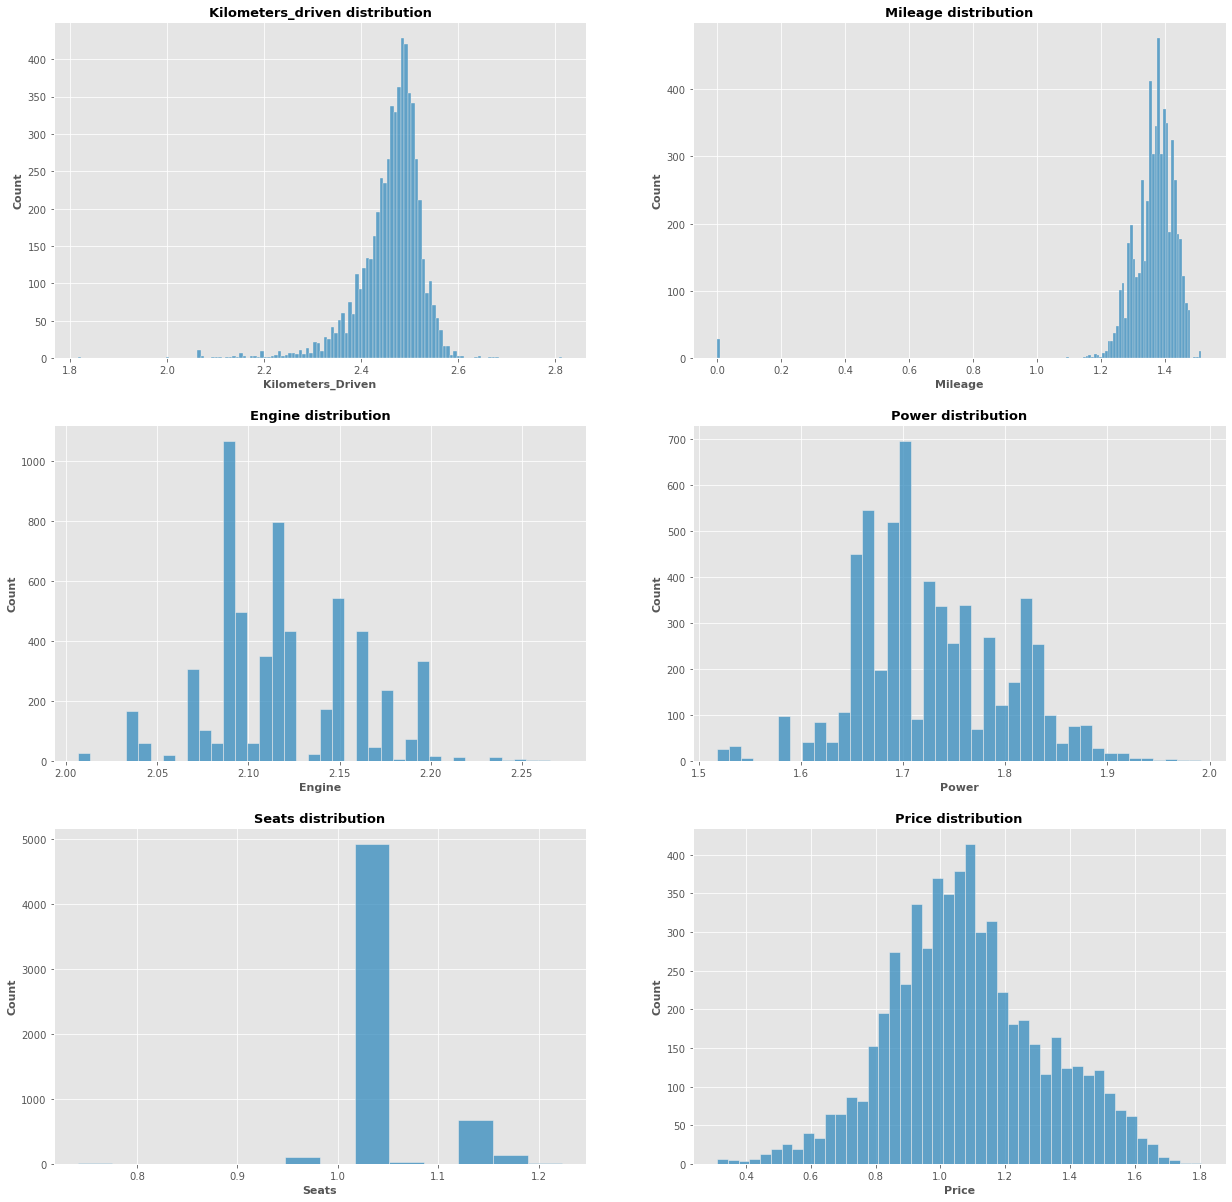

In [32]:
## Прологарифмируем наши данные и посмотрим на их распределение через distplot

fig, axs = plt.subplots(3, 2, figsize=(21, 21))

for ind, col in enumerate(subdf.columns):
    subdf[col] = np.log(subdf[col] + 1)
    sns.histplot(np.log(subdf[col] + 1), ax=axs[ind // 2][ind % 2])
    
    axs[ind // 2][ind % 2].set_title(f'{col.capitalize()} distribution', weight='bold', size=13)
    axs[ind // 2][ind % 2].set_xlabel(col, weight='bold', size=11)
    axs[ind // 2][ind % 2].set_ylabel('Count', weight='bold', size=11)


In [33]:
## при логарифмировании признаков они больше похожи на нормальные распределения, проведем повторные тесты

In [34]:
stats = []
pvals = []
for i in subdf.columns:
    stat, p = shapiro(subdf.dropna()[i])
    stats.append(stat)
    pvals.append(p)
    
stat_tests = pd.DataFrame({'col': subdf.columns, 'stat': stats, 'pvalue': pvals})
stat_tests['test_positive'] = False
stat_tests[stat_tests['pvalue'] > 0.05] = True
stat_tests

,col,stat,pvalue,test_positive
0,Kilometers_Driven,0.920683,0.0,False
1,Mileage,0.729338,0.0,False
2,Engine,0.963707,0.0,False
3,Power,0.973428,0.0,False
4,Seats,0.506347,0.0,False
5,Price,0.956567,0.0,False


In [35]:
stats = []
pvals = []
for i in subdf.columns:
    stat, p = normaltest(subdf.dropna()[i])
    stats.append(stat)
    pvals.append(p)
    
stat_tests = pd.DataFrame({'col': subdf.columns, 'stat': stats, 'pvalue': pvals})
stat_tests['test_positive'] = False
stat_tests[stat_tests['pvalue'] > 0.05] = True
stat_tests

,col,stat,pvalue,test_positive
0,Kilometers_Driven,1620.27258,0.0,False
1,Mileage,5619.061363,0.0,False
2,Engine,149.950781,0.0,False
3,Power,190.58226,0.0,False
4,Seats,1618.82603,0.0,False
5,Price,480.014083,0.0,False


In [36]:
## тесты по прежнему не подтверждают нормальность распределения

## Корреляция

In [37]:
## Опять выберем только числовые признаки

In [38]:
subdf = df.select_dtypes('number')
subdf = subdf.drop('Year', axis=1)


Text(0, 0.5, 'Column')

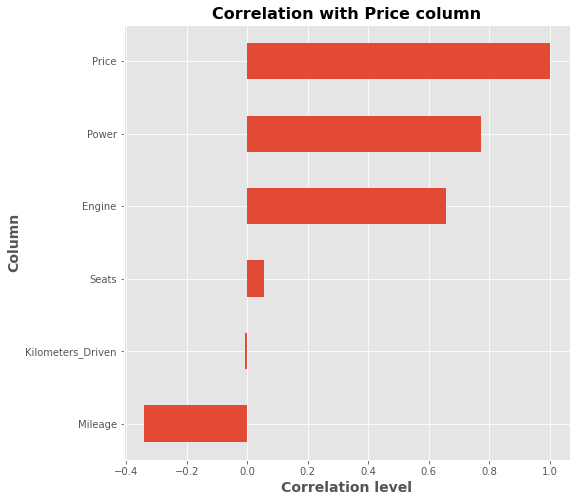

In [39]:
plt.figure(figsize=(8, 8))

subdf.corr()['Price'].sort_values().plot.barh()

plt.title('Correlation with Price column', weight='bold', size=16)
plt.xlabel('Correlation level', weight='bold', size=14)
plt.ylabel('Column', weight='bold', size=14)

## Видно что наибольшая корреляция с Price у Power, Engine и Mileage

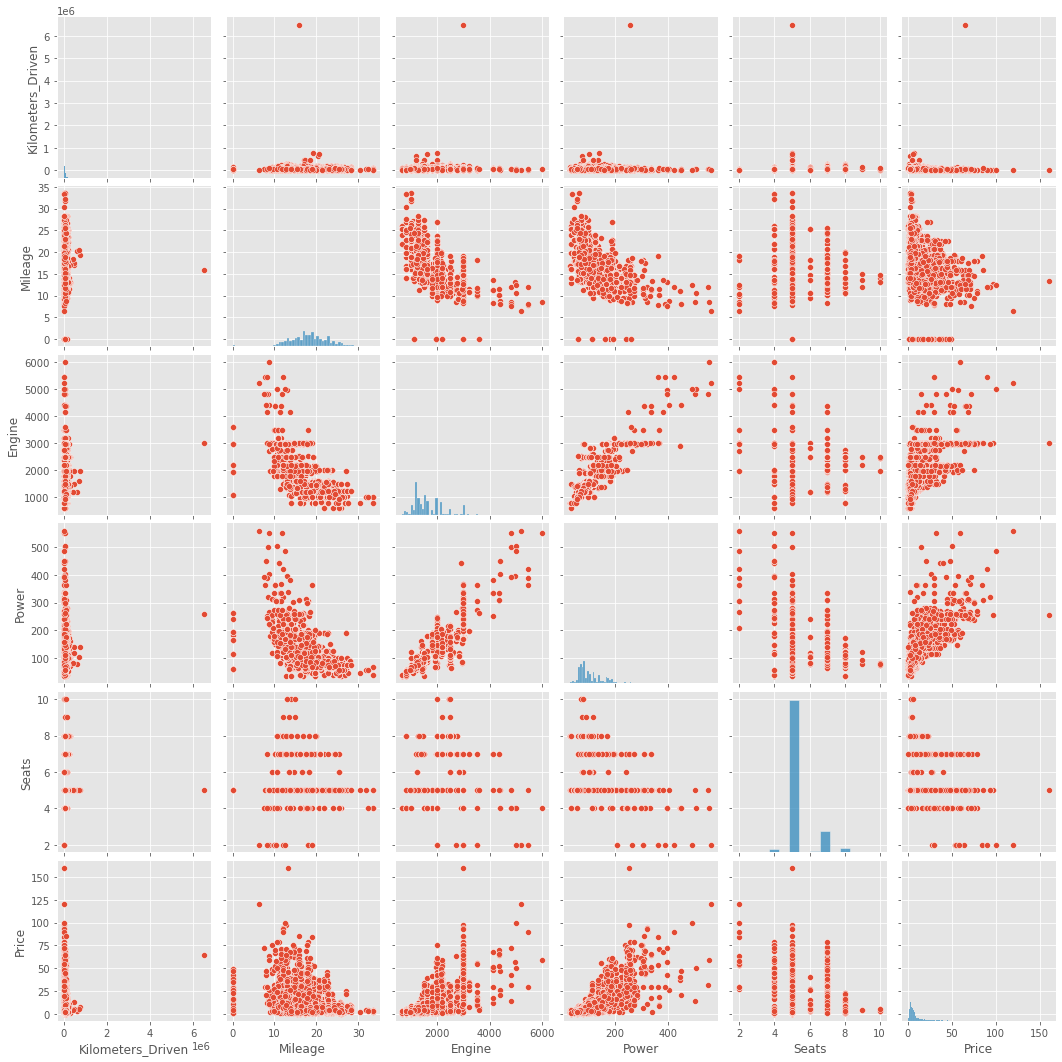

In [40]:
## Попарная зависимость признаков

sns.pairplot(subdf)

In [41]:
## Power и Engine линейно зависят друг от друга
## Power и Price почти линейно зависят друг от друга

In [42]:
## Построим матрицу корреляций

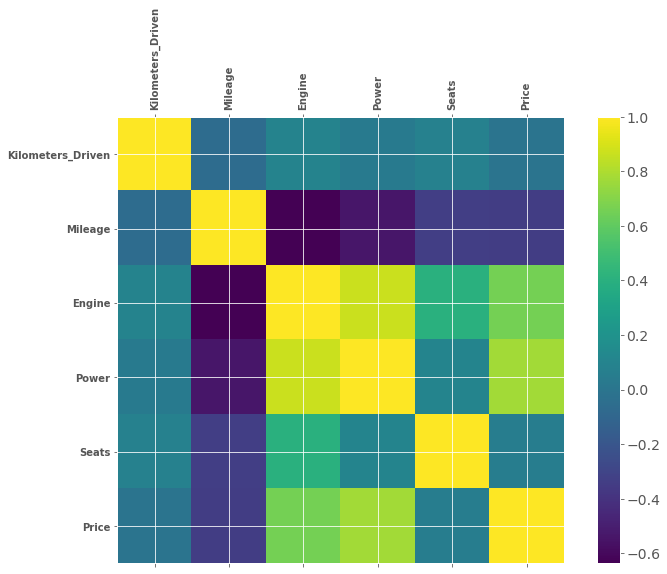

In [43]:
fig = plt.figure(figsize=(12, 8))
plt.matshow(subdf.corr(), fignum=fig.number)
cb = plt.colorbar()
plt.xticks(range(subdf.shape[1]), subdf.columns, fontsize=10, rotation=90, weight='bold')
plt.yticks(range(subdf.shape[1]), subdf.columns, fontsize=10, weight='bold')

cb.ax.tick_params(labelsize=14)
